In [ ]:
!pip install pythainlp
!pip install python-crfsuite
!pip install pandas pythainlp scikit-learn tensorflow
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pythainlp.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from pythainlp import word_tokenize
from ast import literal_eval
from tqdm import tqdm_notebook
from collections import Counter
import re

#viz
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Botnoi/botnoivoice_annotation_final_1.xlsx"

In [ ]:
import pandas as pd

In [ ]:
df_bot = pd.read_excel(path)
# Convert to DataFrame
df = pd.DataFrame(df_bot)

# Function to create a label list from columns with a value of 1
def create_label(row):
    labels = [col for col in df.columns[1:] if row[col] == 1]
    return labels

# Apply the function to each row to create a new 'label' column
df['label'] = df.apply(create_label, axis=1)

# Select only the 'message' and 'label' columns
result_df = df[['message', 'label']]

# Save the result to a CSV file
#result_df.to_csv('labeled_messages.csv', index=False, encoding='utf-8-sig')
result_df

,message,label
0,วันนี้อยากชวนเพื่อนๆ มาทำความรู้จักกับตัวช่วยเ...,"[commerce, ads, story, document]"
1,ตัวนี้คะแนนรีวิว4.9ใน5ปกติ8กล่อง40แผ่นหน้าร้าน...,"[commerce, ads, story, document]"
2,หลังจากนั้นเพียงแค่คุณหนูและนายท่านพิมพ์คำว่าส...,"[commerce, ads, callcenter, story, document, s..."
3,เคล็ดลับในการขายผ้ามือสองให้ได้กำไรเลือกผ้ามือ...,"[commerce, ads, callcenter, story, business, k..."
4,คุ้มสุดคุ้มก็ใบตัดใบนี้เลยครับเเค่ใบเดียวก็ครบ...,"[commerce, ads, callcenter, story, business, d..."
...,...,...
9989,4,[short]
9990,ณ,[short]
9991,ณ,[short]
9992,ณ,[short]


In [ ]:
# Convert to DataFrame
df = pd.DataFrame(result_df)

# Create a new DataFrame with each message repeated for each label
expanded_data = {
    "message": [],
    "label": []
}

for index, row in df.iterrows():
    for label in row["label"]:
        expanded_data["message"].append(row["message"])
        expanded_data["label"].append(label)

expanded_df = pd.DataFrame(expanded_data)

# Save the result to a CSV file
#expanded_df.to_csv('expanded_labeled_messages.csv', index=False, encoding='utf-8-sig')
expanded_df

,message,label
0,วันนี้อยากชวนเพื่อนๆ มาทำความรู้จักกับตัวช่วยเ...,commerce
1,วันนี้อยากชวนเพื่อนๆ มาทำความรู้จักกับตัวช่วยเ...,ads
2,วันนี้อยากชวนเพื่อนๆ มาทำความรู้จักกับตัวช่วยเ...,story
3,วันนี้อยากชวนเพื่อนๆ มาทำความรู้จักกับตัวช่วยเ...,document
4,ตัวนี้คะแนนรีวิว4.9ใน5ปกติ8กล่อง40แผ่นหน้าร้าน...,commerce
...,...,...
14586,4,short
14587,ณ,short
14588,ณ,short
14589,ณ,short


In [ ]:
label_counts = expanded_df['label'].value_counts()
label_counts

label
inform                3851
ads                   1226
short                 1109
topic                  934
commerce               875
knowledge              854
school                 725
document               721
government             696
business               673
story                  656
vocabs                 554
abusewords             311
news                   299
place_review           248
callcenter             213
sport_news             181
travel                 123
religion               112
gambling                89
horoscope               88
entertainment_news      53
Name: count, dtype: int64

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(result_df)

# Create a new DataFrame with each message repeated for each label
expanded_data = {
    "message": [],
    "label": []
}

for index, row in df.iterrows():
    for label in row["label"]:
        expanded_data["message"].append(row["message"])
        expanded_data["label"].append(label)

expanded_df = pd.DataFrame(expanded_data)

# Shuffle the DataFrame to ensure randomness
expanded_df = expanded_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Remove duplicate messages, keeping only the first occurrence
unique_expanded_df = expanded_df.drop_duplicates(subset=['message'])

# Add unique ID column
unique_expanded_df['id'] = range(1, len(unique_expanded_df) + 1)

# Save the result to a CSV file
#unique_expanded_df.to_csv('unique_expanded_labeled_messages.csv', index=False, encoding='utf-8-sig')

unique_expanded_df

<ipython-input-31-8216c2eeb55f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,message,label,id
0,มีการส่งเสริมให้ครูมีการวิเคราะห์ผู้เรียนเป็นร...,school,1
1,ตลอดจนทักษะและประสบการณ์ในการประยุกต์ใช้เทคโนโ...,business,2
2,หมดปัญหาผ้าเยอะผ้าไม่เป็นระเบียบต้องชั้นเสริมว...,callcenter,3
3,หีดำมากควยก็เล็กนี้ดเดียว,abusewords,4
4,คลิกโครมเซดอั๊บดอทอีเอ๊กอี,vocabs,5
...,...,...,...
14583,ข้าพเจ้าไม่ใช้ตำแหน่งหน้าที่บริหารงานแสวงหาผลป...,government,9814
14584,ເປັນຫຍັງເຈົ້າຈຶ່ງເວົ້າພາສາລາວໄດ້?,inform,9815
14586,โดยการดำเนินงานของโครงการเริ่มจาก1สถานศึกษาที่...,inform,9816
14587,2566-10-06 00:00:00,short,9817


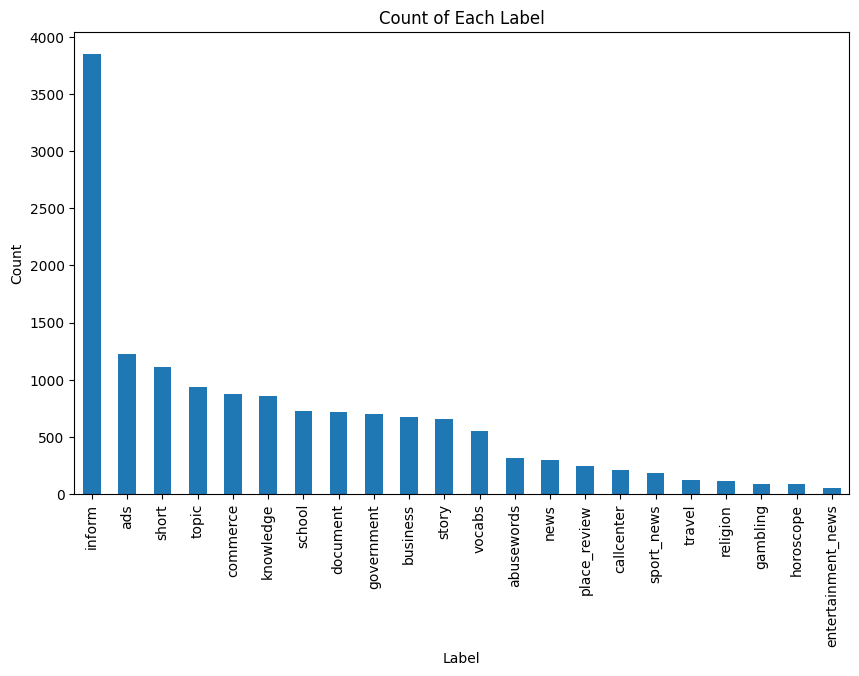

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting with matplotlib
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each Label')
plt.show()


In [ ]:
import pythainlp
from pythainlp.tokenize import word_tokenize

# Function to preprocess the text
def preprocess_text(text):
    tokens = word_tokenize(text, engine='newmm')
    return tokens

# Apply preprocessing to the message column
unique_expanded_df['tokens'] = unique_expanded_df['message'].apply(preprocess_text)
unique_expanded_df.head()


<ipython-input-33-9876283bbe47>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,message,label,id,tokens
0,มีการส่งเสริมให้ครูมีการวิเคราะห์ผู้เรียนเป็นร...,school,1,"[มี, การ, ส่งเสริม, ให้, ครู, มี, การ, วิเคราะ..."
1,ตลอดจนทักษะและประสบการณ์ในการประยุกต์ใช้เทคโนโ...,business,2,"[ตลอดจน, ทักษะ, และ, ประสบการณ์, ใน, การ, ประย..."
2,หมดปัญหาผ้าเยอะผ้าไม่เป็นระเบียบต้องชั้นเสริมว...,callcenter,3,"[หมดปัญหา, ผ้า, เยอะ, ผ้า, ไม่, เป็นระเบียบ, ต..."
3,หีดำมากควยก็เล็กนี้ดเดียว,abusewords,4,"[หี, ดำ, มาก, ควย, ก็, เล็ก, นี้, ด, เดียว]"
4,คลิกโครมเซดอั๊บดอทอีเอ๊กอี,vocabs,5,"[คลิก, โครม, เซ, ดอั๊บ, ดอท, อี, เอ๊, ก, อี]"


In [ ]:
new_df = unique_expanded_df[['label', 'tokens']]
new_df

,label,tokens
0,school,"[มี, การ, ส่งเสริม, ให้, ครู, มี, การ, วิเคราะ..."
1,business,"[ตลอดจน, ทักษะ, และ, ประสบการณ์, ใน, การ, ประย..."
2,callcenter,"[หมดปัญหา, ผ้า, เยอะ, ผ้า, ไม่, เป็นระเบียบ, ต..."
3,abusewords,"[หี, ดำ, มาก, ควย, ก็, เล็ก, นี้, ด, เดียว]"
4,vocabs,"[คลิก, โครม, เซ, ดอั๊บ, ดอท, อี, เอ๊, ก, อี]"
...,...,...
14583,government,"[ข้าพเจ้า, ไม่, ใช้, ตำแหน่งหน้าที่, บริหารงาน..."
14584,inform,[ເປັນຫຍັງເຈົ້າຈຶ່ງເວົ້າພາສາລາວໄດ້?]
14586,inform,"[โดย, การ, ดำเนินงาน, ของ, โครงการ, เริ่ม, จาก..."
14587,short,[]


In [ ]:
# List of labels to keep
labels_to_keep = ['ads', 'short', 'topic', 'school', 'government', 'business', 'story', 'abusewords', 'news', 'place_review', 'callcenter', 'sport_news', 'travel', 'religion']

# Filter DataFrame to include only specified labels
df_filtered = new_df[new_df['label'].isin(labels_to_keep)]

df_filtered


,label,tokens
0,school,"[มี, การ, ส่งเสริม, ให้, ครู, มี, การ, วิเคราะ..."
1,business,"[ตลอดจน, ทักษะ, และ, ประสบการณ์, ใน, การ, ประย..."
2,callcenter,"[หมดปัญหา, ผ้า, เยอะ, ผ้า, ไม่, เป็นระเบียบ, ต..."
3,abusewords,"[หี, ดำ, มาก, ควย, ก็, เล็ก, นี้, ด, เดียว]"
5,ads,"[มา, แล้ว, ค่ะ, วันนี้, มี, พวง, กุน, แจ, สวย,..."
...,...,...
14565,travel,"[สวัสดี, ครับผม, ชื่อ, นาย, ทัศน์, พล, กา, วิ,..."
14580,short,"[หวาน, เจี๊ยบ]"
14583,government,"[ข้าพเจ้า, ไม่, ใช้, ตำแหน่งหน้าที่, บริหารงาน..."
14587,short,[]


In [ ]:
# Create DataFrame
df = pd.DataFrame(new_df)

# Create an empty list to store the dictionaries
data_expanded = []

# Iterate over each row in the original DataFrame and expand tokens
for idx, row in df.iterrows():
    label = row['label']
    tokens = row['tokens']
    for token in tokens:
        data_expanded.append({'label': label, 'token': token})

# Create DataFrame from the list of dictionaries
df_expanded = pd.DataFrame(data_expanded)

# Filter the DataFrame to include only specified labels
desired_labels = ['ads', 'short', 'topic', 'school', 'government', 'business', 'story', 'abusewords', 'news', 'place_review', 'callcenter', 'sport_news', 'travel', 'religion']
df_expanded_filtered = df_expanded[df_expanded['label'].isin(desired_labels)]

df_expanded_filtered

,label,token
0,school,มี
1,school,การ
2,school,ส่งเสริม
3,school,ให้
4,school,ครู
...,...,...
382466,news,และ
382467,news,ทำงาน
382468,news,อยู่
382469,news,ภายในประเทศ


In [ ]:
df_expanded_filtered.rename(columns = {'label':'category'}, inplace = True)
df_expanded_filtered.rename(columns = {'token':'word'}, inplace = True)

<ipython-input-60-17f3506f796a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-60-17f3506f796a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
print(df_expanded_filtered.columns)

Index(['category', 'word'], dtype='object')


'ads','short','topic','school','government','business',
'story','abusewords', 'news','place_review','callcenter','sport_news','travel','religion'





In [ ]:
categories = {
    'ads': [
        'โปรโมชั่น', 'ลดราคา', 'แนะนำ', 'สั่งซื้อ', 'ราคาพิเศษ', 'ของขวัญ', 'สิทธิพิเศษ', 'บริการ',
        'สินค้า', 'โปรโมท', 'ขายดี', 'โปรโมชั่นพิเศษ', 'ลดกระหน่ำ', 'แจกฟรี', 'จัดส่งฟรี', 'ช้อปปิ้ง',
        'ดีล', 'แคมเปญ', 'โฆษณา', 'นำเสนอ', 'สปอนเซอร์', 'ส่วนลด', 'แลกซื้อ', 'ชิงโชค', 'แถม', 'ซื้อหนึ่งแถมหนึ่ง',
        'แพ็กเกจ', 'พิเศษ', 'ดีลเด็ด', 'สินค้าขายดี', 'โปรโมชั่นเด็ด', 'โบรชัวร์', 'โปรโมชั่นสุดคุ้ม','การค้า', 'ธุรกิจ', 'ตลาด', 'การขาย', 'การซื้อขาย', 'ผลิตภัณฑ์', 'สินค้า', 'การตลาด',
        'การจัดการ', 'การบริหาร', 'การทำธุรกิจ', 'การค้าขาย', 'การนำเข้า', 'การส่งออก', 'เศรษฐกิจ',
        'การลงทุน', 'กำไร', 'ขาดทุน', 'ต้นทุน', 'รายได้', 'รายจ่าย', 'รายรับ', 'การเจรจา', 'การดำเนินงาน',
        'การจัดการ', 'การบริหารงาน', 'การผลิต', 'การจัดจำหน่าย', 'การจัดส่ง', 'การซื้อ', 'การขายส่ง',
        'การขายปลีก', 'ร้านค้า', 'ร้านขาย', 'ผู้ค้าส่ง', 'ผู้ค้าปลีก', 'ผู้ขาย', 'ผู้ซื้อ', 'ตลาดการค้า'
    ],
    'short': [
        'ข้อความสั้น', 'ข้อมูลย่อ', 'ข่าวสั้น', 'แจ้งเตือน', 'สรุป', 'ข้อความด่วน', 'กระชับ', 'สั้นๆ',
        'สั้นกระชับ', 'ย่อ', 'ข้อความย่อ', 'รายละเอียดสั้น', 'ย่อหน้า', 'เนื้อหาสั้น', 'กระชับข้อมูล',
        'แจ้งสั้น', 'บันทึกย่อ', 'สั้นลง', 'ข่าวด่วน', 'ประกาศสั้น', 'ข้อความด่วน', 'ข้อมูลด่วน',
        'ประกาศย่อ', 'เนื้อหาย่อ', 'ข้อมูลกระชับ', 'บันทึกด่วน', 'ประกาศด่วน'
    ],
    'topic': [
        'หัวข้อสนทนา', 'เรื่องราว', 'ประเด็น', 'ข่าวสาร', 'เรื่อง', 'ประเด็นหลัก', 'หัวข้อข่าว', 'ประเด็นข่าว',
        'เรื่องหลัก', 'หัวข้อหลัก', 'ประเด็นย่อย', 'หัวข้อย่อย', 'เรื่องย่อ', 'สาระ', 'เนื้อหา', 'ประเด็นสำคัญ',
        'บทความ', 'หัวข้อเรื่อง', 'ประเด็นเรื่อง', 'หัวข้อบทความ', 'ประเด็นบทความ', 'หัวข้อสนทนา',
        'เรื่องสนทนา', 'เนื้อหาสนทนา', 'หัวข้อการประชุม', 'ประเด็นการประชุม', 'หัวข้อวิจัย', 'ประเด็นวิจัย'
    ],

    'school': [
        'โรงเรียน', 'ครู', 'นักเรียน', 'การศึกษา', 'ห้องเรียน', 'การเรียน', 'วิชา', 'การบ้าน', 'การสอบ',
        'ตารางเรียน', 'การสอน', 'การฝึกอบรม', 'หนังสือเรียน', 'สมุด', 'ปากกา', 'ดินสอ', 'ยางลบ',
        'ไม้บรรทัด', 'เครื่องเขียน', 'การทดสอบ', 'วิชาการ', 'การเข้าชั้นเรียน', 'การอบรม', 'การพัฒนา',
        'การฝึกฝน', 'การปรับปรุง', 'การประเมิน', 'การจัดการศึกษา', 'การจัดการเรียนการสอน', 'การวางแผนการเรียน',
        'การประเมินผล', 'การสอบวัดผล', 'การสอบวัดความรู้', 'การจัดห้องเรียน', 'การจัดการห้องเรียน',
        'การสร้างสรรค์', 'การส่งเสริม', 'การสนับสนุน', 'การให้คำปรึกษา', 'การติดตามผล', 'การสนับสนุนการเรียน','ส่งเสริม','ความรู้', 'วิชาการ', 'การศึกษา', 'บทเรียน', 'ข้อมูล', 'การเรียนรู้', 'การสอน', 'การเรียนการสอน',
        'การศึกษา', 'การวิจัย', 'การวิเคราะห์', 'การสังเคราะห์', 'การทดลอง', 'การอ่าน', 'การเขียน',
        'การคำนวณ', 'การฝึกอบรม', 'การสืบค้น', 'การเรียนรู้ด้วยตนเอง', 'การศึกษาต่อ', 'การศึกษาวิทยาศาสตร์',
        'การศึกษาเทคโนโลยี', 'การศึกษาเชิงทฤษฎี', 'การศึกษาเชิงปฏิบัติ', 'การเรียนการสอน', 'การค้นคว้า',
        'การค้นคว้าวิจัย', 'การศึกษาอิสระ', 'การศึกษาภาษาต่างประเทศ', 'การศึกษาในห้องเรียน', 'การศึกษาออนไลน์',
        'การศึกษาภาคสนาม', 'การศึกษานอกระบบ', 'การศึกษาเพื่อชีวิต', 'การศึกษาเพื่ออาชีพ', 'การศึกษาสำหรับผู้ใหญ่'
    ],
    'government': [
        'รัฐบาล', 'นโยบาย', 'การปกครอง', 'หน่วยงาน', 'เจ้าหน้าที่', 'กฎหมาย', 'ระเบียบ', 'ข้อบังคับ', 'การประชุม',
        'การบริหาร', 'การจัดการ', 'การปฏิรูป', 'การพัฒนา', 'การกำกับดูแล', 'การตรวจสอบ', 'การวางแผน', 'การประเมินผล',
        'การแก้ไขปัญหา', 'การอนุมัติ', 'การรับรอง', 'การกำหนดนโยบาย', 'การดำเนินนโยบาย', 'การบริหารงาน', 'การบริหารราชการ',
        'การจัดการองค์กร', 'การจัดการหน่วยงาน', 'การดำเนินการ', 'การปฏิบัติงาน', 'การจัดทำแผนงาน', 'การจัดทำโครงการ',
        'การดำเนินโครงการ', 'การจัดทำงบประมาณ', 'การจัดทำรายงาน', 'การติดตามผล', 'การประเมินผลการดำเนินงาน',
        'การจัดการปัญหา', 'การจัดการทรัพยากร', 'การจัดการบุคลากร', 'การจัดการงบประมาณ', 'การจัดการข้อมูล', 'การจัดการเอกสาร',
        'การจัดการการประชุม', 'การจัดการการสื่อสาร', 'การจัดการความเสี่ยง', 'การจัดการความปลอดภัย', 'การจัดการความมั่นคง'
    ],
    'business': [
        'ธุรกิจ', 'บริษัท', 'องค์กร', 'การลงทุน', 'ผู้ประกอบการ', 'การบริหาร', 'การจัดการ', 'การตลาด', 'การผลิต',
        'การขาย', 'การซื้อ', 'การจัดจำหน่าย', 'การส่งออก', 'การนำเข้า', 'การจัดการทรัพยากร', 'การจัดการบุคลากร',
        'การจัดการการเงิน', 'การจัดการข้อมูล', 'การจัดการการประชุม', 'การจัดการการสื่อสาร', 'การจัดการความเสี่ยง',
        'การจัดการความปลอดภัย', 'การจัดการความมั่นคง', 'การจัดการนวัตกรรม', 'การจัดการเทคโนโลยี', 'การจัดการทรัพย์สิน',
        'การจัดการสิ่งแวดล้อม', 'การจัดการพลังงาน', 'การจัดการคุณภาพ', 'การจัดการอาชีวอนามัย', 'การจัดการสุขภาพ',
        'การจัดการประสิทธิภาพ', 'การจัดการผลิตภาพ', 'การจัดการโครงการ', 'การจัดการเครือข่าย', 'การจัดการระบบสารสนเทศ',
        'การจัดการโลจิสติกส์', 'การจัดการซัพพลายเชน', 'การจัดการนโยบาย', 'การจัดการยุทธศาสตร์', 'การจัดการกลยุทธ์',
        'การจัดการการเปลี่ยนแปลง', 'การจัดการนวัตกรรม', 'การจัดการเทคโนโลยีสารสนเทศ', 'การจัดการการตลาดดิจิทัล','การเงิน', 'การลงทุน', 'เศรษฐกิจ', 'ธนาคาร', 'ตลาดหุ้น', 'การบริหารการเงิน', 'การจัดการการเงิน', 'การวางแผนการเงิน',
        'การวิเคราะห์การเงิน', 'การทำงบการเงิน', 'การตรวจสอบการเงิน', 'การจัดทำงบประมาณ', 'การจัดการบัญชี', 'การจัดการหนี้',
        'การบริหารการเงินการลงทุน', 'การบริหารความเสี่ยงทางการเงิน', 'การจัดการทรัพย์สิน', 'การจัดการสินทรัพย์',
        'การจัดการหนี้สิน', 'การจัดการเงินสด', 'การจัดการเงินทุน', 'การจัดการเงินตราต่างประเทศ', 'การจัดการเงินปันผล',
        'การจัดการเงินฝาก', 'การจัดการเงินทุนสำรอง', 'การจัดการเงินสำรอง', 'การจัดการเงินส่วนบุคคล', 'การจัดการเงินส่วนรวม',
        'การจัดการเงินส่วนภาครัฐ', 'การจัดการเงินส่วนภาคเอกชน', 'การจัดการเงินส่วนภาคธุรกิจ', 'การจัดการเงินส่วนภาคประชาชน',
        'การจัดการเงินส่วนภาคสาธารณะ', 'การจัดการเงินส่วนภาคสังคม', 'การจัดการเงินส่วนภาคท้องถิ่น', 'การจัดการเงินส่วนภาคกลาง',
        'การจัดการเงินส่วนภาคเหนือ', 'การจัดการเงินส่วนภาคใต้', 'การจัดการเงินส่วนภาคตะวันออก', 'การจัดการเงินส่วนภาคตะวันตก',
        'การจัดการเงินส่วนภาคตะวันออกเฉียงเหนือ', 'การจัดการเงินส่วนภาคกลาง', 'การจัดการเงินส่วนภาคเหนือ', 'การจัดการเงินส่วนภาคใต้',
        'การจัดการเงินส่วนภาคตะวันออก', 'การจัดการเงินส่วนภาคตะวันตก', 'การจัดการเงินส่วนภาคตะวันออกเฉียงเหนือ','การเงิน'
    ],
    'story': [
        'เรื่องราว', 'นิทาน', 'เรื่องเล่า', 'ประสบการณ์', 'เรื่องสั้น', 'ตำนาน', 'นิยาย', 'เรื่องย่อ', 'เรื่องเต็ม',
        'บทประพันธ์', 'การบอกเล่า', 'การเล่าเรื่อง', 'การบรรยาย', 'การบรรยายภาพ', 'การบรรยายเรื่อง', 'การบรรยายเหตุการณ์',
        'การเล่าเหตุการณ์', 'การเล่าประสบการณ์', 'การบอกเล่าประสบการณ์', 'การเขียนเรื่อง', 'การเขียนนิทาน', 'การเขียนนิยาย',
        'การเขียนเรื่องสั้น', 'การเขียนเรื่องย่อ', 'การเขียนบทประพันธ์', 'การเขียนบท', 'การเขียนบทภาพยนตร์', 'การเขียนบทละคร',
        'การเขียนบทวิจารณ์', 'การเขียนบทความ', 'การเขียนหนังสือ', 'การเขียนบันทึก', 'การเขียนบันทึกเหตุการณ์',
        'การเขียนบันทึกประสบการณ์', 'การเขียนบันทึกชีวิต', 'การเขียนบันทึกการเดินทาง', 'การเขียนบันทึกท่องเที่ยว',
        'การเขียนบันทึกผจญภัย', 'การเขียนบันทึกเหตุการณ์สำคัญ', 'การเขียนบันทึกประสบการณ์สำคัญ', 'การเขียนบันทึกชีวิตประจำวัน'
    ],

    'abusewords': [
        'คำหยาบ', 'ด่า', 'ดูถูก', 'เหยียดหยาม', 'ก้าวร้าว', 'คำว่า', 'คำหยาบคาย', 'คำด่า', 'คำดูถูก', 'คำเหยียดหยาม',
        'คำก้าวร้าว', 'คำไม่สุภาพ', 'คำลามก', 'คำหยาบโลน', 'คำเสียดสี', 'เฮงซวย', 'คำประนาม', 'ไอ้เห้ย', 'ไอ้สัตว์',
        'อีตอแหล', 'ไอ้ระยำ', 'คำด่าว่า', 'คำด่าว่า', 'อีดอกทอง', 'ไอ้หน้าโง่', 'อีดอกทอง', 'เปรต', 'คำด่าว่า', 'คำด่าว่า',
        'หี', 'คำด่าว่า', 'ดำ', 'ควย', 'คำด่าว่า', 'คำด่าว่า', 'คำด่าว่า', 'คำด่าว่า', 'คำด่าว่า', 'คำด่าว่า',
        'คำด่าว่า', 'คำด่าว่า', 'คำด่าว่า', 'คำด่าว่า', 'คำด่าว่า', 'คำด่าว่า', 'คำด่าว่า', 'คำด่าว่า', 'คำด่าว่า', 'คำด่าว่า'
    ],
    'news': [
        'ข่าว', 'รายงานข่าว', 'ข่าวสาร', 'เหตุการณ์', 'การรายงาน', 'ข่าวด่วน', 'ข่าวสด', 'ข่าวอัปเดต', 'ข่าวทันเหตุการณ์',
        'ข่าววันนี้', 'ข่าวล่าสุด', 'ข่าวประชาสัมพันธ์', 'ข่าวประกาศ', 'ข่าวบันเทิง', 'ข่าวกีฬา', 'ข่าวการเมือง',
        'ข่าวเศรษฐกิจ', 'ข่าวสังคม', 'ข่าวเทคโนโลยี', 'ข่าววิทยาศาสตร์', 'ข่าวสุขภาพ', 'ข่าวสิ่งแวดล้อม', 'ข่าวท่องเที่ยว',
        'ข่าวอาชญากรรม', 'ข่าวการศึกษา', 'ข่าวการงาน', 'ข่าวการเงิน', 'ข่าวตลาดหุ้น', 'ข่าวอสังหาริมทรัพย์',
        'ข่าวต่างประเทศ', 'ข่าวในประเทศ', 'ข่าวท้องถิ่น', 'ข่าววัฒนธรรม', 'ข่าวศิลปะ', 'ข่าวภาพยนตร์', 'ข่าวละคร',
        'ข่าวเพลง', 'ข่าวดนตรี', 'ข่าวนักร้อง', 'ข่าวนักแสดง', 'ข่าวเซเลบ', 'ข่าวผู้มีชื่อเสียง', 'ข่าวนักการเมือง',
        'ข่าวราชการ', 'ข่าวการเมือง', 'ข่าวอัปเดต', 'ข่าวปัจจุบัน', 'ข่าวแวดวง', 'ข่าวหน้าหนึ่ง', 'ข่าวจากสื่อ', 'ข่าวจากสถานีโทรทัศน์'
    ],
    'place_review': [
        'รีวิว', 'สถานที่', 'ร้านอาหาร', 'โรงแรม', 'การท่องเที่ยว', 'ที่พัก', 'ร้านกาแฟ', 'ที่เที่ยว', 'ที่กิน',
        'ที่นอน', 'สถานที่ท่องเที่ยว', 'สถานที่พัก', 'สถานที่กิน', 'สถานที่นอน', 'สถานที่เที่ยว', 'สถานที่ชมวิว',
        'สถานที่พักผ่อน', 'สถานที่ท่องเที่ยวสำคัญ', 'สถานที่ท่องเที่ยวดัง', 'สถานที่ท่องเที่ยวสวย', 'สถานที่ท่องเที่ยวดี',
        'สถานที่ท่องเที่ยวแนะนำ', 'สถานที่ท่องเที่ยวใหม่', 'สถานที่ท่องเที่ยวฮิต', 'สถานที่ท่องเที่ยวราคาถูก',
        'สถานที่ท่องเที่ยวสุดฮิต', 'สถานที่ท่องเที่ยวแปลก', 'สถานที่ท่องเที่ยวที่ต้องไป', 'สถานที่ท่องเที่ยวที่ไม่ควรพลาด',
        'สถานที่ท่องเที่ยวที่น่าสนใจ', 'สถานที่ท่องเที่ยวที่ควรไป', 'สถานที่ท่องเที่ยวที่ดี', 'สถานที่ท่องเที่ยวที่สวย',
        'สถานที่ท่องเที่ยวที่สนุก', 'สถานที่ท่องเที่ยวที่เหมาะ', 'สถานที่ท่องเที่ยวที่ชอบ', 'สถานที่ท่องเที่ยวที่โปรด',
        'สถานที่ท่องเที่ยวที่เยี่ยม', 'สถานที่ท่องเที่ยวที่ยอดเยี่ยม', 'สถานที่ท่องเที่ยวที่ดีเยี่ยม', 'สถานที่ท่องเที่ยวที่ห้ามพลาด',
        'สถานที่ท่องเที่ยวที่แนะนำ', 'สถานที่ท่องเที่ยวที่มาแรง', 'สถานที่ท่องเที่ยวที่น่าตื่นเต้น', 'สถานที่ท่องเที่ยวที่โดดเด่น'
    ],
    'callcenter': [
        'คอลเซ็นเตอร์', 'บริการลูกค้า', 'ติดต่อ', 'สายด่วน', 'บริการ', 'โทรศัพท์', 'โทรติดต่อ', 'รับสาย', 'โทรสอบถาม',
        'บริการตอบคำถาม', 'บริการช่วยเหลือ', 'บริการให้ข้อมูล', 'บริการแจ้งปัญหา', 'บริการแจ้งเหตุ', 'บริการรับเรื่อง',
        'บริการให้คำปรึกษา', 'บริการให้คำแนะนำ', 'บริการให้คำแนะนำทางโทรศัพท์', 'บริการให้คำแนะนำออนไลน์',
        'บริการให้คำแนะนำด้วยแชท', 'บริการให้คำแนะนำด้วยอีเมล', 'บริการให้คำแนะนำด้วยข้อความ', 'บริการให้คำแนะนำด้วยวิดีโอคอล',
        'บริการให้คำแนะนำด้วยแอปพลิเคชัน', 'บริการให้คำแนะนำด้วยเว็บไซต์', 'บริการให้คำแนะนำด้วยบอท', 'บริการให้คำแนะนำด้วยเสียง',
        'บริการให้คำแนะนำด้วยภาพ', 'บริการให้คำแนะนำด้วยวีดีโอ', 'บริการให้คำแนะนำด้วยพนักงาน', 'บริการให้คำแนะนำด้วยผู้เชี่ยวชาญ',
        'บริการให้คำแนะนำด้วยทีมงาน', 'บริการให้คำแนะนำด้วยระบบ', 'บริการให้คำแนะนำด้วยโปรแกรม', 'บริการให้คำแนะนำด้วยแอพพลิเคชั่น',
        'บริการให้คำแนะนำด้วยเว็บไซต์', 'บริการให้คำแนะนำด้วยซอฟต์แวร์', 'บริการให้คำแนะนำด้วยอินเตอร์เน็ต', 'บริการให้คำแนะนำด้วยโทรศัพท์มือถือ'
    ],
    'sport_news': [
        'กีฬา', 'ข่าวกีฬา', 'การแข่งขัน', 'นักกีฬา', 'ทีม', 'ลีก', 'สโมสร', 'สนามกีฬา', 'การแข่งกีฬา',
        'การแข่งฟุตบอล', 'การแข่งเทนนิส', 'การแข่งบาสเกตบอล', 'การแข่งวอลเลย์บอล', 'การแข่งกอล์ฟ', 'การแข่งมวย',
        'การแข่งแบดมินตัน', 'การแข่งรักบี้', 'การแข่งฮอกกี้', 'การแข่งกีฬาอื่นๆ', 'การแข่งขันกีฬา', 'การแข่งขันฟุตบอล',
        'การแข่งขันเทนนิส', 'การแข่งขันบาสเกตบอล', 'การแข่งขันวอลเลย์บอล', 'การแข่งขันกอล์ฟ', 'การแข่งขันมวย',
        'การแข่งขันแบดมินตัน', 'การแข่งขันรักบี้', 'การแข่งขันฮอกกี้', 'การแข่งขันกีฬานานาชาติ', 'การแข่งขันกีฬาภายในประเทศ',
        'การแข่งขันกีฬาในท้องถิ่น', 'การแข่งขันกีฬาในระดับโรงเรียน', 'การแข่งขันกีฬาในระดับมหาวิทยาลัย', 'การแข่งขันกีฬาในระดับชุมชน',
        'การแข่งขันกีฬาในระดับจังหวัด', 'การแข่งขันกีฬาในระดับประเทศ', 'การแข่งขันกีฬาในระดับโลก', 'การแข่งขันกีฬาในระดับทวีป',
        'การแข่งขันกีฬาในระดับภูมิภาค', 'การแข่งขันกีฬาในระดับอำเภอ', 'การแข่งขันกีฬาในระดับตำบล', 'การแข่งขันกีฬาในระดับหมู่บ้าน',
        'การแข่งขันกีฬาในระดับบ้าน', 'การแข่งขันกีฬาในระดับครอบครัว', 'การแข่งขันกีฬาในระดับกลุ่มเพื่อน', 'การแข่งขันกีฬาในระดับทีม'
    ],
    'travel': [
        'การท่องเที่ยว', 'ทริป', 'เที่ยว', 'สถานที่ท่องเที่ยว', 'เดินทาง', 'ทัวร์', 'ทริปท่องเที่ยว', 'ทริปเดินทาง',
        'ทริปสำรวจ', 'ทริปผจญภัย', 'ทริปท่องเที่ยวสำรวจ', 'ทริปท่องเที่ยวผจญภัย', 'ทริปท่องเที่ยวธรรมชาติ', 'ทริปท่องเที่ยววัฒนธรรม',
        'ทริปท่องเที่ยวประวัติศาสตร์', 'ทริปท่องเที่ยวภูเขา', 'ทริปท่องเที่ยวทะเล', 'ทริปท่องเที่ยวป่าไม้', 'ทริปท่องเที่ยวแม่น้ำ',
        'ทริปท่องเที่ยวทะเลสาบ', 'ทริปท่องเที่ยวทะเลทราย', 'ทริปท่องเที่ยวเกาะ', 'ทริปท่องเที่ยวอุทยาน', 'ทริปท่องเที่ยวพิพิธภัณฑ์',
        'ทริปท่องเที่ยวสวนสนุก', 'ทริปท่องเที่ยวห้างสรรพสินค้า', 'ทริปท่องเที่ยวตลาดนัด', 'ทริปท่องเที่ยวชุมชน', 'ทริปท่องเที่ยวหมู่บ้าน',
        'ทริปท่องเที่ยวเมือง', 'ทริปท่องเที่ยวจังหวัด', 'ทริปท่องเที่ยวประเทศ', 'ทริปท่องเที่ยวต่างประเทศ', 'ทริปท่องเที่ยวในประเทศ',
        'ทริปท่องเที่ยวต่างทวีป', 'ทริปท่องเที่ยวในทวีป', 'ทริปท่องเที่ยวเขตร้อน', 'ทริปท่องเที่ยวเขตหนาว', 'ทริปท่องเที่ยวเขตเมือง',
        'ทริปท่องเที่ยวเขตชนบท', 'ทริปท่องเที่ยวเขตภูเขา', 'ทริปท่องเที่ยวเขตทะเล', 'ทริปท่องเที่ยวเขตป่าไม้', 'ทริปท่องเที่ยวเขตแม่น้ำ'
    ],
    'religion': [
        'ศาสนา', 'พระเจ้า', 'พิธีกรรม', 'ศรัทธา', 'การบูชา', 'พิธี', 'การนับถือศาสนา', 'การประกอบพิธี', 'การสวดมนต์',
        'การปฏิบัติธรรม', 'การทำบุญ', 'การสอนธรรมะ', 'การฟังธรรม', 'การเจริญสติ', 'การปฏิบัติธรรม', 'การทำสมาธิ',
        'การบำเพ็ญบุญ', 'การแผ่เมตตา', 'การบำเพ็ญเพียร', 'การบูชาพระเจ้า', 'การบูชาพระพุทธเจ้า', 'การบูชาพระธรรม',
        'การบูชาพระสงฆ์', 'การบูชาพระโพธิสัตว์', 'การบูชาพระอริยสงฆ์', 'การบูชาพระอาจารย์', 'การบูชาพระเถระ', 'การบูชาพระสาวก',
        'การบูชาพระสัทธรรม', 'การบูชาพระธรรมคำสอน', 'การบูชาพระธรรมเทศนา', 'การบูชาพระธรรมวิจารณ์', 'การบูชาพระธรรมมติ',
        'การบูชาพระธรรมภาษิต', 'การบูชาพระธรรมสุภาษิต', 'การบูชาพระธรรมสัทธรรม', 'การบูชาพระธรรมปริยัติ', 'การบูชาพระธรรมปฏิบัติ',
        'การบูชาพระธรรมปริยัติธรรม', 'การบูชาพระธรรมปฏิบัติธรรม', 'การบูชาพระธรรมปรมัตถธรรม', 'การบูชาพระธรรมวิภาษณ์',
        'การบูชาพระธรรมมติ', 'การบูชาพระธรรมวิจารณ์', 'การบูชาพระธรรมเทศนา', 'การบูชาพระธรรมปาฐกถา', 'การบูชาพระธรรมปริยาย',
        'การบูชาพระธรรมปริยัติ', 'การบูชาพระธรรมปฏิบัติ', 'การบูชาพระธรรมปริยัติธรรม', 'การบูชาพระธรรมปฏิบัติธรรม',
        'การบูชาพระธรรมปรมัตถธรรม', 'การบูชาพระธรรมวิภาษณ์', 'การบูชาพระธรรมมติ', 'การบูชาพระธรรมวิจารณ์'
    ]
}

In [ ]:
df = unique_expanded_df

# Function to classify text based on keywords
def classify_text(tokens, categories):
    category_scores = {category: 0 for category in categories}
    for token in tokens:
        for category, keywords in categories.items():
            if token in keywords:
                category_scores[category] += 1
    total_tokens = len(tokens)
    if total_tokens > 0:
        category_percentages = {category: score / total_tokens for category, score in category_scores.items()}
    else:
        category_percentages = {category: 0 for category in categories}
    return category_percentages

# Apply classification to the tokens
df['category_scores'] = df['tokens'].apply(lambda tokens: classify_text(tokens, categories))

# Extract the percentage of each category
category_columns = list(categories.keys())
for category in category_columns:
    df[category + '_percent'] = df['category_scores'].apply(lambda scores: scores[category])

# Display the results
result_df = df[['message'] + [category + '_percent' for category in category_columns]]
result_df.head()


<ipython-input-46-582e62956616>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-46-582e62956616>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-46-582e62956616>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-46-582e629566

,message,ads_percent,short_percent,topic_percent,school_percent,government_percent,business_percent,story_percent,abusewords_percent,news_percent,place_review_percent,callcenter_percent,sport_news_percent,travel_percent,religion_percent
0,มีการส่งเสริมให้ครูมีการวิเคราะห์ผู้เรียนเป็นร...,0.005747,0.005747,0.005747,0.068966,0.005747,0.005747,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,ตลอดจนทักษะและประสบการณ์ในการประยุกต์ใช้เทคโนโ...,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,หมดปัญหาผ้าเยอะผ้าไม่เป็นระเบียบต้องชั้นเสริมว...,0.022222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,หีดำมากควยก็เล็กนี้ดเดียว,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
4,คลิกโครมเซดอั๊บดอทอีเอ๊กอี,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
words = []
categories_list = []

# Loop through the dictionary to extract words and their corresponding categories
for category, word_list in categories.items():
    for word in word_list:
        words.append(word)
        categories_list.append(category)

# Create DataFrame
df_category = pd.DataFrame({'word': words, 'category': categories_list})

df_category

,word,category
0,โปรโมชั่น,ads
1,ลดราคา,ads
2,แนะนำ,ads
3,สั่งซื้อ,ads
4,ราคาพิเศษ,ads
...,...,...
709,การบูชาพระธรรมปฏิบัติธรรม,religion
710,การบูชาพระธรรมปรมัตถธรรม,religion
711,การบูชาพระธรรมวิภาษณ์,religion
712,การบูชาพระธรรมมติ,religion


In [ ]:
print(df_category.columns)

Index(['word', 'category'], dtype='object')


In [ ]:
combined_df = pd.concat([df_expanded_filtered, df_category], axis=0, ignore_index=True)
combined_df

,category,word
0,school,มี
1,school,การ
2,school,ส่งเสริม
3,school,ให้
4,school,ครู
...,...,...
204826,religion,การบูชาพระธรรมปฏิบัติธรรม
204827,religion,การบูชาพระธรรมปรมัตถธรรม
204828,religion,การบูชาพระธรรมวิภาษณ์
204829,religion,การบูชาพระธรรมมติ


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_df['word'], combined_df['category'], test_size=0.2, random_state=42)

# Convert text data to numerical vectors
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Support Vector Classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train_vec, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  abusewords       0.44      0.14      0.21      1568
         ads       0.23      0.74      0.35      7527
    business       0.31      0.05      0.08      3297
  callcenter       0.71      0.02      0.04       522
  government       0.27      0.19      0.22      3821
        news       0.25      0.04      0.07      2742
place_review       0.28      0.07      0.12      2247
    religion       0.41      0.11      0.17      1026
      school       0.28      0.26      0.27      4044
       short       0.23      0.02      0.03       552
  sport_news       0.47      0.13      0.20      1853
       story       0.27      0.26      0.26      5719
       topic       0.21      0.10      0.14      5091
      travel       0.41      0.05      0.09       958

    accuracy                           0.25     40967
   macro avg       0.34      0.16      0.16     40967
weighted avg       0.29      0.25      0.21     40967



In [ ]:
# Predict category of new input message
new_message = "วันนี้ครูจะมาสอนวิชาคณิตศาสตร์"
new_message_vec = vectorizer.transform([new_message])
predicted_category = classifier.predict(new_message_vec)
print("Predicted category:", predicted_category)


Predicted category: ['ads']


In [ ]:
new_message = "ครู"
new_message_vec = vectorizer.transform([new_message])
predicted_probabilities = classifier.decision_function(new_message_vec)
predicted_category_index = np.argmax(predicted_probabilities)
confidence_score = predicted_probabilities[0][predicted_category_index]
predicted_category = classifier.classes_[predicted_category_index]

if confidence_score > 0:
    print("Predicted category:", predicted_category, "with confidence:", confidence_score)


Predicted category: government with confidence: 13.309522204466816
